# Introduction à l'ANOVA et l'Analyse de sensibilité

## Objectif
Ce notebook vise à illustrer la mise en oeuvre de l'ANOVA et de l'Analyse de sensibilité avec OpenTURNS.

Il présente aussi les données d'un cas test de signature EM de corps sur lequel on peut tester différents métamodèles.

## Import modules et data

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


On commence par charger les données qui sont dans un fichier .csv avec comme séparateur un ;
Les données d'entrée sont déjà normalisées

To read files from google colab

url_name='https://raw.githubusercontent.com/dbetteb/early-ML/master/08_CAS_TEST_SER/data_scaled.csv'

xy_tot = pd.read_csv(url_name, header=0,sep=';')

In [4]:
url_name='https://raw.githubusercontent.com/dbetteb/early-ML/master/08_CAS_TEST_SER/data_scaled.csv'
xy_tot = pd.read_csv(url_name, header=0,sep=';')

Sinon en local

In [ ]:
file_name="data_scaled.csv"
xy_tot=pd.read_csv(file_name,header=0,sep=';')
xy_tot.describe()

,Logive,Rnez,Lfente,Pfente,Dengin,LBB,Pos,Fleche_BA,Fleche_BF,Corde,H,y
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,1.110000e+02
mean,0.497335,0.499360,0.498114,0.500438,0.497902,0.502162,0.496423,0.503372,0.500216,0.500145,0.503438,1.801801e-11
std,0.291364,0.294132,0.291572,0.290533,0.293118,0.290416,0.292513,0.290781,0.293343,0.290855,0.290823,1.000000e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.144837e+00
25%,0.249340,0.248046,0.251255,0.254569,0.245518,0.259067,0.244946,0.257116,0.250675,0.255086,0.258540,-7.387808e-01
50%,0.495338,0.501609,0.497895,0.500335,0.498257,0.501992,0.497005,0.503145,0.500258,0.500010,0.504185,1.914246e-02
75%,0.742680,0.750742,0.749488,0.748856,0.749841,0.745628,0.745938,0.750699,0.751053,0.744964,0.751018,7.946404e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.625505e+00


Visualisation

In [5]:
print(xy_tot)

       Logive      Rnez    Lfente    Pfente    Dengin       LBB       Pos  \
0    0.495338  0.000000  0.497895  0.500335  0.498257  0.501992  0.000000   
1    0.839713  0.797224  0.544219  0.117688  0.386605  0.936888  0.859441   
2    0.718764  0.462412  0.122786  0.000000  0.148126  0.284999  0.572958   
3    0.232614  0.964583  0.208857  0.493698  0.087776  0.514571  0.915970   
4    0.328525  0.360263  0.771815  0.737518  0.032510  0.805642  0.444953   
..        ...       ...       ...       ...       ...       ...       ...   
106  0.893357  0.616894  0.666424  0.040633  0.112727  0.749508  0.408983   
107  0.954314  0.544326  0.619205  0.588434  0.649281  0.113298  0.877323   
108  0.673615  0.753639  0.953679  0.019827  0.826220  0.468277  0.894760   
109  0.655463  0.940585  0.931341  0.540705  0.040912  0.268522  0.286047   
110  0.018758  0.603489  0.405507  0.007256  0.637778  0.919163  0.230755   

     Fleche_BA  Fleche_BF     Corde         H         y  
0     0.503145   

Pour voir le format des données

In [ ]:
xy_tot.shape

(111, 12)

## ANOVA

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
results = ols('y ~ Logive+Rnez+Lfente+Pfente+Dengin+LBB+Pos+Fleche_BA+Fleche_BF+Corde+H', data=xy_tot).fit()

In [ ]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Logive,3.764760,1.0,63.855565,2.509619e-12
Rnez,0.060988,1.0,1.034434,3.115987e-01
Lfente,0.020915,1.0,0.354749,5.527961e-01
Pfente,0.009864,1.0,0.167303,6.834035e-01
Dengin,0.485694,1.0,8.238044,5.016189e-03
LBB,51.942016,1.0,881.008801,4.402781e-51
Pos,0.669155,1.0,11.349801,1.076363e-03
Fleche_BA,6.925141,1.0,117.460019,1.640449e-18
Fleche_BF,0.772318,1.0,13.099585,4.674633e-04
Corde,10.236574,1.0,173.626527,1.666877e-23


## Métamodèles

**Modèle de type régression linéaire**

On sépare input et sortie y

In [ ]:
y_tot= xy_tot.pop('y')

In [ ]:
y_tot.shape

(111,)

In [ ]:
xy_tot.shape

(111, 11)

In [ ]:
import sklearn.linear_model as lm
linreg = lm.LinearRegression()

In [ ]:
lr=linreg.fit(xy_tot, y_tot)

In [ ]:
lr.coef_

array([ 0.63524533,  0.0801131 ,  0.0473146 , -0.03260559, -0.22678993,
        2.36752092, -0.26686172, -0.8631107 ,  0.28595473,  1.0495401 ,
        1.7477699 ])

In [ ]:
linreg.score(xy_tot,y_tot)

0.9469383113421451

Tracés

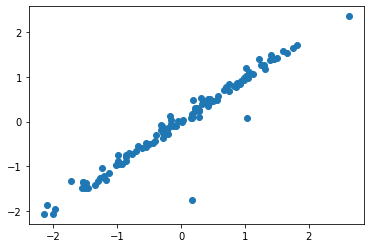

In [ ]:
plt.plot(y_tot,lr.predict(xy_tot),'o')

**Modèle de type MLP SKLEARN**

On sépare les données entre apprentissage et test (20%)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xy_tot, y_tot, test_size=0.1)

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
nnet=MLPRegressor(hidden_layer_sizes=(10,),max_iter=10000,activation='tanh',alpha=0.05,solver='lbfgs')

In [ ]:
nnet.fit(x_train,y_train)

MLPRegressor(activation='tanh', alpha=0.05, hidden_layer_sizes=(10,),
             max_iter=10000, solver='lbfgs')

In [ ]:
y_pred=nnet.predict(x_test)

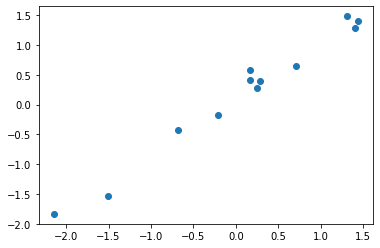

In [ ]:
plt.plot(y_test, y_pred,'o')

Calcul du coefficient de détermination R2

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.9667672765057969

**Exercice 2** : Tester d'autres métamodèles

## Analyse de sensibilité

Nous allons utiliser OpenTURNS et les 3 composantes de l'ACP

Pour Colab

In [6]:
!pip install openturns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 12.8 MB/s eta 0:00:00


In [7]:
import openturns as ot
import openturns.viewer as otv

In [8]:
#To read files from google colab
url_name='https://raw.githubusercontent.com/dbetteb/early-ML/master/08_CAS_TEST_SER/data_scaled2.csv'
xy_tot = pd.read_csv(url_name, header=0,sep=';')

In [ ]:
#from local file
file_name="data_scaled2.csv"
xy_tot=pd.read_csv(file_name,header=0,sep=';')
xy_tot.describe()

On extrait les 3 sorties, à savoir les valeurs sur les 3 premières composantes de l'ACP

In [9]:
y_tot = pd.concat([xy_tot.pop(x) for x in ['y1', 'y2','y3']], 1)
y_tot

<ipython-input-9-a668e155bec7>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  y_tot = pd.concat([xy_tot.pop(x) for x in ['y1', 'y2','y3']], 1)


,y1,y2,y3
0,15.082215,-5.248569,0.048376
1,14.428133,17.671144,1.892574
2,13.639695,-23.445469,1.156799
3,-14.621491,0.000358,4.929759
4,15.061054,1.235525,4.753541
...,...,...,...
106,4.654538,7.894375,5.374924
107,-5.866806,-13.270626,-2.350050
108,-10.408305,8.893657,-2.098407
109,-4.366241,-12.467366,4.576693


On génère des points d'échantillonnages suivant une distribution uniforme indépendante pour chaque variable - Les variables d'entrée du dataset sont normalisées entre 0 et 1

In [10]:
distribution = ot.ComposedDistribution([ot.Uniform(0.0, 1.0)] * 11)
dimension = distribution.getDimension()
distribution.setDescription(["Logive", "Rnez", "Lfente", "Pfente", "Dengin", "LBB", "Pos","Fleche_BA", "Fleche_BF", "Corde", "H"])

In [11]:
ot.RandomGenerator.SetSeed(0)
size = 10000
inputDesign = ot.SobolIndicesExperiment(distribution, size, False).generate()
inputDesign.getSize()

130000

**Explication cf site OpenTURNS** : Sensitivity algorithms rely on the definition of specific designs. The method generates designs that can be used for Saltelli, Jansen, Martinez and MauntzKucherenko methods. This precomputes such input designs using distribution or experiment by generating a MC sample of twice the dimension by duplicating the distribution into a 2d distribution with repeated marginals, in order to also work with non-iid samples such as those generated by LHSExperiment or LowDiscrepancyExperiment. The sampling is done according to the given experiment, then it is split into samples A and B and the columns of these ones are mixed to define the huge sample (design). If computeSecondOrder is set to False, the result design is of size N(d+2) where d is the dimension of the distribution. If computeSecondOrder is set to True, the design size is N(2d+2).


=> Input pour pick and freeze

On va calculer les indices en s'appuyant sur un métamodèle pour calculer les valeurs sur les points d'échantillonnage - ici modèle linéaire **avec interactions**

In [12]:
import sklearn.linear_model as lm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [13]:
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly_inter=Pipeline([
             ('poly',interaction),
             ('regressor',lm.LinearRegression())])



**On fitte un modèle linéaire avec interactions par composante**

In [14]:
poly_inter.fit(xy_tot, y_tot)

Pipeline(steps=[('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('regressor', LinearRegression())])

On vérifie la qualité des métamodèles

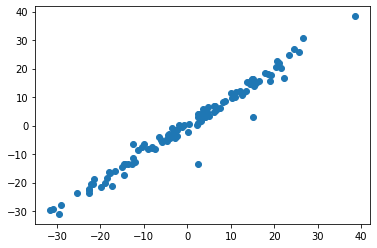

In [15]:
import matplotlib.pyplot as plt
plt.plot(y_tot['y1'],poly_inter.predict(xy_tot)[:,0],'o')

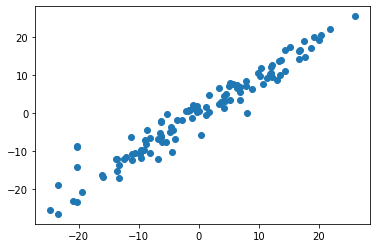

In [16]:
plt.plot(y_tot['y2'],poly_inter.predict(xy_tot)[:,1],'o')

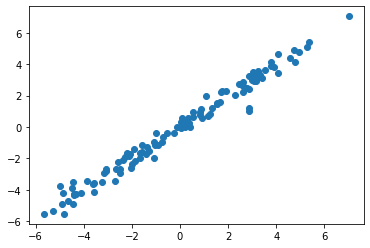

In [17]:
plt.plot(y_tot['y3'],poly_inter.predict(xy_tot)[:,2],'o')

In [18]:
poly_inter.score(xy_tot,y_tot)

0.9634662718960828

**On calcule les valeurs prédites pour les points d'échantillonnage**

In [19]:
outputDesign=np.zeros((np.shape(inputDesign)[0],3))
outputDesign = poly_inter.predict(inputDesign)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [20]:
outputDesign1=ot.Sample(outputDesign)

**On calcule les indices de sensibilité principaux et totaux et les IC associés avec méthode de Martinez pour la première composante**

In [21]:
sensitivityAnalysis = ot.MartinezSensitivityAlgorithm(inputDesign, outputDesign1.getMarginal([0]), size)
first_indice = sensitivityAnalysis.getFirstOrderIndices()
total_indice = sensitivityAnalysis.getTotalOrderIndices()
first_indiceIC = sensitivityAnalysis.getFirstOrderIndicesInterval()
total_indiceIC = sensitivityAnalysis.getTotalOrderIndicesInterval()

In [22]:
print(first_indice)
print(total_indice)
print(first_indiceIC)
print(total_indiceIC)

[0.022531,-0.014248,-0.0140205,-0.0133593,-0.0112318,0.473554,-0.00514327,0.053375,-0.00422653,0.0730302,0.261011]#11
[0.0447973,0.0156877,0.00125672,0.00597272,0.00910463,0.491434,0.0130709,0.0731795,0.0187353,0.102983,0.282423]#11
[-0.000233452, 0.0461605]
[-0.0367245, 0.00939048]
[-0.0367918, 0.00911211]
[-0.035165, 0.00948617]
[-0.0339717, 0.0121772]
[0.458676, 0.486185]
[-0.0286338, 0.0180825]
[0.0299223, 0.0753763]
[-0.0279425, 0.0196564]
[0.0484278, 0.0971254]
[0.239584, 0.281736]
[0.0128929, 0.075024]
[-0.0159514, 0.0452715]
[-0.0298046, 0.0304058]
[-0.0251899, 0.0352313]
[-0.0223945, 0.0387036]
[0.450296, 0.53096]
[-0.018276, 0.0426964]
[0.0395589, 0.103404]
[-0.0126653, 0.048192]
[0.0692628, 0.134671]
[0.243399, 0.31973]


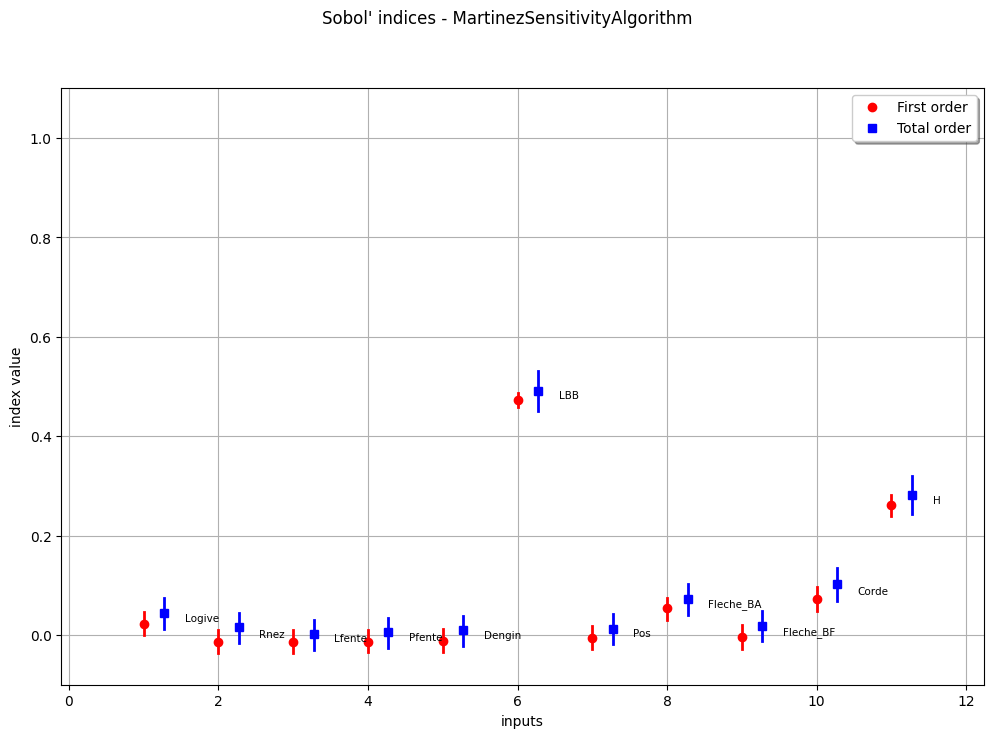

In [23]:
otv.View(sensitivityAnalysis.draw(), (1200, 800))

Analyse par composante

In [24]:
for j in range(1,3):
    sensitivityAnalysisb = ot.MartinezSensitivityAlgorithm(inputDesign, outputDesign1.getMarginal([j]), size)
    bb = sensitivityAnalysisb.getFirstOrderIndices()
    tt = sensitivityAnalysisb.getTotalOrderIndices()
    first_indice=np.vstack((first_indice,bb))
    total_indice=np.vstack((total_indice,tt))


Tracés

In [25]:
variables = ["Logive", "Rnez", "Lfente", "Pfente", "Dengin", "LBB", "Pos","Fleche_BA", "Fleche_BF", "Corde", "H"]
xxx = np.arange(len(variables))  # the label locations
width = 0.2  # the width of the bars


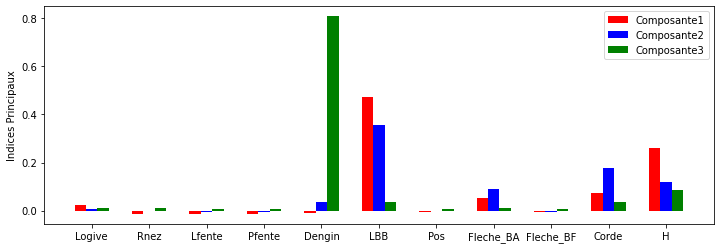

In [59]:
fig, ax = plt.subplots()
fig.set_figwidth(12)
rects1 = ax.bar(xxx - width, first_indice[0,:], width, color='red',label='Composante1')
rects2 = ax.bar(xxx , first_indice[1,:], width, color='blue',label='Composante2')
rects3 = ax.bar(xxx + width, first_indice[2,:], width, color='green',label='Composante3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Indices Principaux')
ax.set_xticks(xxx)
ax.set_xticklabels(variables)
ax.legend()

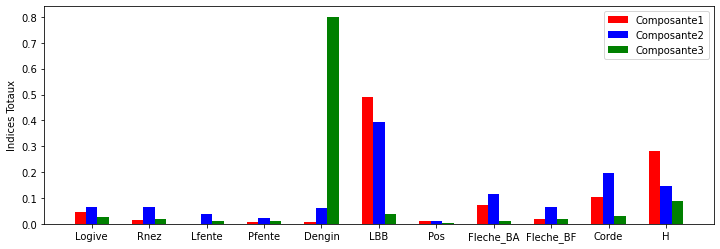

In [58]:
fig, ax = plt.subplots()
fig.set_figwidth(12)
rects1 = ax.bar(xxx - width, total_indice[0,:], width, color='red',label='Composante1')
rects2 = ax.bar(xxx , total_indice[1,:], width, color='blue',label='Composante2')
rects3 = ax.bar(xxx + width, total_indice[2,:], width, color='green',label='Composante3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Indices Totaux')
ax.set_xticks(xxx)
ax.set_xticklabels(variables)
ax.legend()

**Indices** **HSIC**

Ici on a besoin de moins de points, et on peut utiliser directement xy_tot, mais vous pouvez essayer d'utiliser le métamodèle en exercice

Par exemple en construisant un LHS space filling de 200 points

In [28]:
nexp=200
#LHS initial
lhs = ot.LHSExperiment(distribution, nexp, False, False)
# optimisation space filling
space_filling = ot.SpaceFillingC2()
temp_profile_ini = ot.GeometricProfile(20, 0.95, 0)
algo_optim = ot.SimulatedAnnealingLHS(lhs, space_filling, temp_profile_ini)
planexp = algo_optim.generate()


Pour calculer des indices HSIC, il faut choisir un type de noyau, ici SquaredExponential

In [37]:
xy_totHSIC=ot.Sample(np.array(xy_tot))

In [39]:
covarianceModelCollection = []
for i in range(xy_tot.shape[1]):
    Xi = xy_totHSIC.getMarginal(i)
    Cov = ot.SquaredExponential(1)
    Cov.setScale(Xi.computeStandardDeviation())
    covarianceModelCollection.append(Cov)

In [45]:
outputHSIC=ot.Sample(np.array(y_tot))

Pour les 3 composantes de la sortie, on calcule les indices HSIC et les p-value associées

Il faut choisir un type de noyau aussi pour la sortie

In [46]:

covarianceModelCollection.append(ot.SquaredExponential(outputHSIC[:,0].computeStandardDeviation()))
estimatorType = ot.HSICUStat() # could be HSICVStat instead if enough sample
hsic = ot.HSICEstimatorGlobalSensitivity(covarianceModelCollection, xy_totHSIC, outputHSIC[:,0], estimatorType)

resu_indices=np.zeros((xy_tot.shape[1],6))
resu_indices[:,0]=hsic.getR2HSICIndices()
resu_indices[:,1]=np.array(hsic.getPValuesPermutation())

covarianceModelCollection.pop(-1)
covarianceModelCollection.append(ot.SquaredExponential(outputHSIC[:,1].computeStandardDeviation()))
hsic = ot.HSICEstimatorGlobalSensitivity(covarianceModelCollection, xy_totHSIC, outputHSIC[:,1], estimatorType)
resu_indices[:,2]=hsic.getR2HSICIndices()
resu_indices[:,3]=np.array(hsic.getPValuesPermutation())

covarianceModelCollection.pop(-1)
covarianceModelCollection.append(ot.SquaredExponential(outputHSIC[:,2].computeStandardDeviation()))
hsic = ot.HSICEstimatorGlobalSensitivity(covarianceModelCollection, xy_totHSIC, outputHSIC[:,2], estimatorType)
resu_indices[:,4]=hsic.getR2HSICIndices()
resu_indices[:,5]=np.array(hsic.getPValuesPermutation())


L'analyse de sensibilité se fait d'abord sur la p-value, **la variable est influente lorsqu'elle est faible**

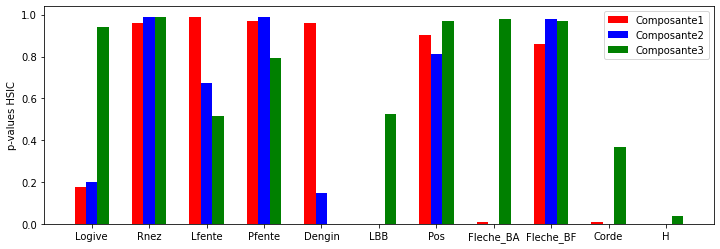

In [61]:
fig, ax = plt.subplots()
fig.set_figwidth(12)
rects1 = ax.bar(xxx - width, resu_indices[:,1], width, color='red',label='Composante1')
rects2 = ax.bar(xxx , resu_indices[:,3], width, color='blue',label='Composante2')
rects3 = ax.bar(xxx + width, resu_indices[:,5], width, color='green',label='Composante3')

ax.set_ylabel('p-values HSIC')
ax.set_xticks(xxx)
ax.set_xticklabels(variables)
ax.legend()

**Analyse globale des 3 composantes**

In [ ]:
sensitivity_algorithm = ot.MartinezSensitivityAlgorithm(inputDesign, outputDesign1, size)

In [ ]:
first_indiceag = sensitivity_algorithm.getAggregatedFirstOrderIndices()
total_indiceag = sensitivity_algorithm.getAggregatedTotalOrderIndices()
print(first_indiceag)
print(total_indiceag)

[0.0151212,-0.00854355,-0.0104087,-0.0103765,0.0269986,0.416756,-0.00412585,0.0667961,-0.0041967,0.112802,0.200923]#11
[0.052845,0.0354414,0.0161217,0.0124949,0.0498801,0.44153,0.0121907,0.088794,0.0367803,0.138965,0.223261]#11


Calcul d'intervalles de confiance par bootstrap

In [ ]:
nr_bootstrap = 100
confidence_level = 0.95

sensitivity_algorithm.setBootstrapSize(nr_bootstrap)
sensitivity_algorithm.setConfidenceLevel(confidence_level)
sensitivity_algorithm.setUseAsymptoticDistribution(False)
interval_fo = sensitivity_algorithm.getFirstOrderIndicesInterval()
interval_to = sensitivity_algorithm.getTotalOrderIndicesInterval()
print("bootstrap intervals")
print("Aggregated first order indices interval = ", interval_fo)
print("Aggregated total order indices interval = ", interval_to)

bootstrap intervals
Aggregated first order indices interval =  [-0.0012562, 0.0343153]
[-0.0260659, 0.0112166]
[-0.0273675, 0.00961852]
[-0.028188, 0.0105824]
[0.00922727, 0.0477072]
[0.404945, 0.432543]
[-0.0216457, 0.0160362]
[0.0478843, 0.0877946]
[-0.0213294, 0.0159221]
[0.0940227, 0.132184]
[0.185767, 0.217862]
Aggregated total order indices interval =  [0.0297017, 0.0734331]
[0.0122131, 0.0561221]
[-0.00589868, 0.0357769]
[-0.00965522, 0.0323454]
[0.0263733, 0.0708627]
[0.408552, 0.470644]
[-0.010046, 0.0320897]
[0.0646034, 0.109828]
[0.0136064, 0.0576918]
[0.115469, 0.161093]
[0.198225, 0.24455]


Plot

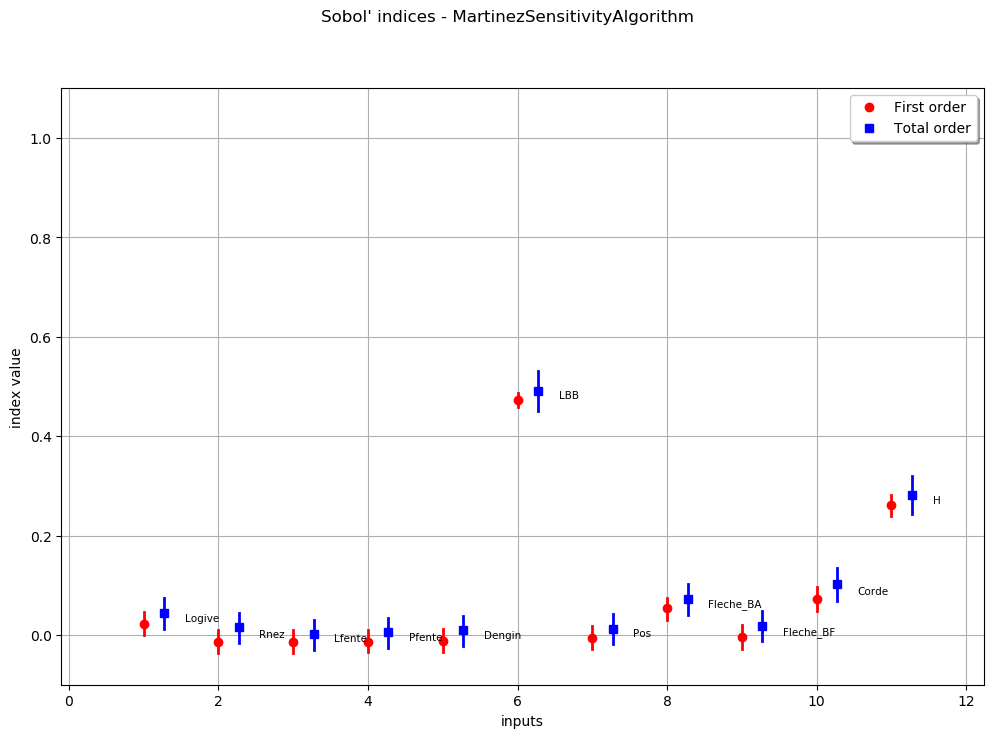

In [ ]:
otv.View(sensitivityAnalysis.draw(), (1200, 800))